In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
def load_csv_data(root_dir: str, filename: str) -> pd.DataFrame:
	return pd.read_csv(os.path.join(root_dir, filename))

def calculate_age(dob, dod):
    dob_date = datetime.strptime(dob, "%Y-%m-%d %H:%M:%S")
    dod_date = datetime.strptime(dod, "%Y-%m-%d %H:%M:%S")
    age = (dod_date - dob_date).days // 365
    return age


In [3]:
# Load the data
ROOT_DIR = '/Users/arodriguez/Desktop/ut-msai-ai-in-healthcare-FA24/demo_data/mimic-iii-clinical-database-demo-1.4'
admissions_df = load_csv_data(ROOT_DIR, 'ADMISSIONS.csv')
patients_df = load_csv_data(ROOT_DIR, 'PATIENTS.csv')
patients_df["age"] = patients_df.apply(lambda row: calculate_age(row["dob"], row["dod"]), axis=1)
patients_df = patients_df[patients_df["age"] < 120]
prescriptions_df = load_csv_data(ROOT_DIR, 'PRESCRIPTIONS.csv')
# cast subject_id to int
prescriptions_df['subject_id'] = prescriptions_df['subject_id'].astype(int)
diagnoses_df = load_csv_data(ROOT_DIR, 'DIAGNOSES_ICD.csv')
procedures_df = load_csv_data(ROOT_DIR, 'PROCEDURES_ICD.csv')
d_icd_diagnoses_df = load_csv_data(ROOT_DIR, 'D_ICD_DIAGNOSES.csv')
d_icd_procedures_df = load_csv_data(ROOT_DIR, 'D_ICD_PROCEDURES.csv')

chart_events_df = load_csv_data(ROOT_DIR, 'CHARTEVENTS.csv')

admissions_df.head(n=20)

/var/folders/1m/tsk5_0ys4vdg_1_93x7h7hh80000gn/T/ipykernel_5788/4231083904.py:2: DtypeWarning: Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join(root_dir, filename))


,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1
5,12277,10026,103770,2195-05-17 07:39:00,2195-05-24 11:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,NaN,OTHER,NaN,WHITE,2195-05-17 01:49:00,2195-05-17 08:29:00,STROKE/TIA,0,1
6,12278,10027,199395,2190-07-13 07:15:00,2190-07-25 14:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,MITRAL REGURGITATION;CORONARY ARTERY DISEASE\...,0,1
7,12280,10029,132349,2139-09-22 10:58:00,2139-10-02 14:29:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,PROTESTANT QUAKER,DIVORCED,WHITE,2139-09-22 06:03:00,2139-09-22 11:50:00,SYNCOPE;TELEMETRY,0,1
8,12282,10032,140372,2138-04-02 19:52:00,2138-04-15 14:35:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,NaN,CATHOLIC,WIDOWED,WHITE,2138-04-02 14:56:00,2138-04-02 20:40:00,RIGHT HUMEROUS FRACTURE,0,1
9,12283,10033,157235,2132-12-05 02:46:00,2132-12-08 15:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,POLI,CATHOLIC,MARRIED,WHITE,2132-12-04 20:11:00,2132-12-05 04:05:00,RENAL FAILIURE-SYNCOPE-HYPERKALEMIA,0,1


In [4]:
prescriptions_df.head(n=20)

,row_id,subject_id,hadm_id,icustay_id,startdate,enddate,drug_type,drug,drug_name_poe,drug_name_generic,formulary_drug_cd,gsn,ndc,prod_strength,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,route
0,32600,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Pneumococcal Vac Polyvalent,Pneumococcal Vac Polyvalent,PNEUMOcoccal Vac Polyvalent,PNEU25I,48548.0,6.494300e+06,25mcg/0.5mL Vial,0.5,mL,1,VIAL,IM
1,32601,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Bisacodyl,Bisacodyl,Bisacodyl,BISA5,2947.0,5.363381e+08,5 mg Tab,10,mg,2,TAB,PO
2,32602,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Bisacodyl,Bisacodyl,Bisacodyl (Rectal),BISA10R,2944.0,5.747050e+08,10mg Suppository,10,mg,1,SUPP,PR
3,32603,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Senna,Senna,Senna,SENN187,19964.0,9.045166e+08,1 Tablet,1,TAB,1,TAB,PO
4,32604,42458,159647,NaN,2146-07-21 00:00:00,2146-07-21 00:00:00,MAIN,Docusate Sodium (Liquid),Docusate Sodium (Liquid),Docusate Sodium (Liquid),DOCU100L,3017.0,1.210544e+08,100mg UD Cup,100,mg,1,UDCUP,PO
5,32605,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Heparin,Heparin,Heparin Sodium,HEPA5I,6549.0,6.332303e+10,5000 Units / mL- 1mL Vial,5000,UNIT,1,mL,SC
6,32606,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Simvastatin,Simvastatin,Simvastatin,SIMV10,16577.0,5.107905e+10,10mg Tablet,20,mg,2,TAB,PO
7,32607,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Aspirin,Aspirin,Aspirin,ASA81,4380.0,9.044041e+08,81mg Tab,162,mg,2,TAB,PO
8,32608,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Donepezil,Donepezil,Donepezil,DONE5,29335.0,6.285602e+10,5mg Tablet,10,mg,2,TAB,PO
9,32609,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Gabapentin,Gabapentin,Gabapentin,GABA100,21413.0,9.045632e+08,100mg Capsule,100,mg,1,CAP,PO


In [5]:
patients_df.head(n=100)

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,age
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,71
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1,36
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1,87
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1,77
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1,48
...,...,...,...,...,...,...,...,...,...
94,31800,43927,F,2104-02-12 00:00:00,2176-09-09 00:00:00,2176-09-09 00:00:00,2176-09-09 00:00:00,1,72
95,31838,44083,M,2057-11-15 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00,1,56
97,31867,44212,F,2078-06-16 00:00:00,2124-01-29 00:00:00,NaN,2124-01-29 00:00:00,1,45
98,31870,44222,M,2107-06-27 00:00:00,2182-08-03 00:00:00,2182-08-03 00:00:00,NaN,1,75


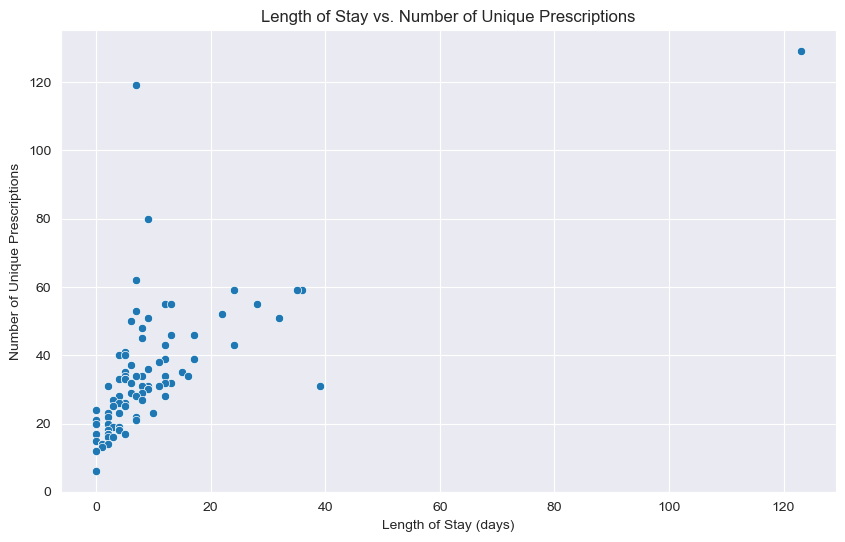

In [6]:
# Visual 1: For each subject ID, calculate the length of stay and the number of prescriptions, then plot the data

# Merge the admissions and prescriptions dataframes
admissions_prescriptions_df = pd.merge(admissions_df, prescriptions_df, on='subject_id', how='left')

# Calculate the length of stay for each subject ID
admissions_prescriptions_df['admittime'] = pd.to_datetime(admissions_prescriptions_df['admittime'])
admissions_prescriptions_df['dischtime'] = pd.to_datetime(admissions_prescriptions_df['dischtime'])
admissions_prescriptions_df['length_of_stay'] = (admissions_prescriptions_df['dischtime'] - admissions_prescriptions_df['admittime']).dt.days

# Calculate the number of distinct drug for each subject ID with drug_type = 'MAIN'
num_prescriptions = admissions_prescriptions_df[admissions_prescriptions_df['drug_type'] == 'MAIN'].groupby('subject_id')['drug'].nunique().reset_index()
num_prescriptions.columns = ['subject_id', 'num_prescriptions']


# Add the length of stay to the num_prescriptions dataframe and deduplicate the data
num_prescriptions = pd.merge(num_prescriptions, admissions_prescriptions_df[['subject_id', 'length_of_stay']], on='subject_id', how='left')
num_prescriptions = num_prescriptions.drop_duplicates(subset='subject_id')

num_prescriptions.sort_values(by='num_prescriptions', ascending=False, inplace=True)

num_prescriptions.head(n=20)

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='length_of_stay', y='num_prescriptions', data=num_prescriptions)
plt.title('Length of Stay vs. Number of Unique Prescriptions')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Number of Unique Prescriptions')
plt.show()



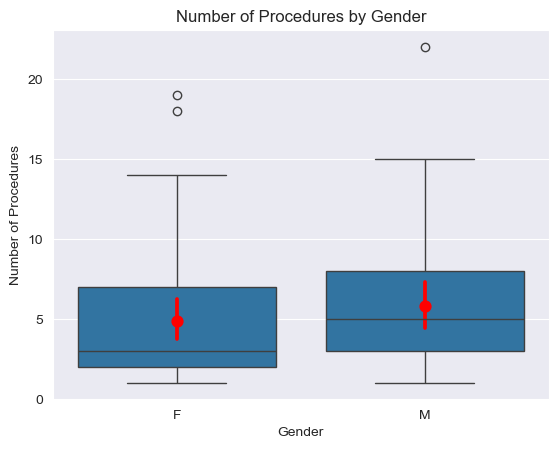

In [7]:
# Visual 2: Get table with the number of procedures for each subject ID with their gender as a column and then generate a boxplot comparing the distribution of procedure number for the two genders

# Merge the procedures and patients dataframes
procedures_patients_df = pd.merge(procedures_df, patients_df, on='subject_id', how='left')

# Get the number of procedures and gender for each subject ID
num_procedures = procedures_patients_df.groupby(['subject_id'])['icd9_code'].nunique().reset_index()
num_procedures.columns = ['subject_id', 'num_procedures']

gender = procedures_patients_df[['subject_id', 'gender']]

# Merge the number of procedures and gender dataframes
combined_df = pd.merge(num_procedures, gender, on='subject_id', how='left')

# Drop duplicates
combined_df = combined_df.drop_duplicates(subset='subject_id')

# Create two boxplots comparing the distribution of procedure number for males and females
# Create the boxplot
sns.boxplot(x='gender', y='num_procedures', data=combined_df)

sns.pointplot(x='gender', y='num_procedures', data=combined_df, 
              estimator='mean', color='red', markers='o', linestyles='')

# Add a title and labels
plt.title('Number of Procedures by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Procedures')


# Show the plot
plt.show()


In [8]:
# Visual 3: Mortality rate by age group

# Merge the admissions and patients dataframes
admissions_patients_df = pd.merge(admissions_df, patients_df, on='subject_id', how='inner')

# Create df with subject_id, hospital_expire_flag, and age
mortality_df = admissions_patients_df[['subject_id', 'hospital_expire_flag', 'age']]

mortality_df.head(n=25)

,subject_id,hospital_expire_flag,age
0,10006,0,71
1,10011,1,36
2,10013,1,87
3,10017,0,77
4,10019,1,48
5,10027,0,82
6,10029,0,79
7,10032,0,88
8,10033,0,82
9,10035,0,80


/var/folders/1m/tsk5_0ys4vdg_1_93x7h7hh80000gn/T/ipykernel_5788/1078190928.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_df['age_group'] = pd.cut(mortality_df['age'], bins=bins, labels=labels, right=False)
/var/folders/1m/tsk5_0ys4vdg_1_93x7h7hh80000gn/T/ipykernel_5788/1078190928.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mortality_rate = mortality_df.groupby('age_group')['hospital_expire_flag'].mean().reset_index()


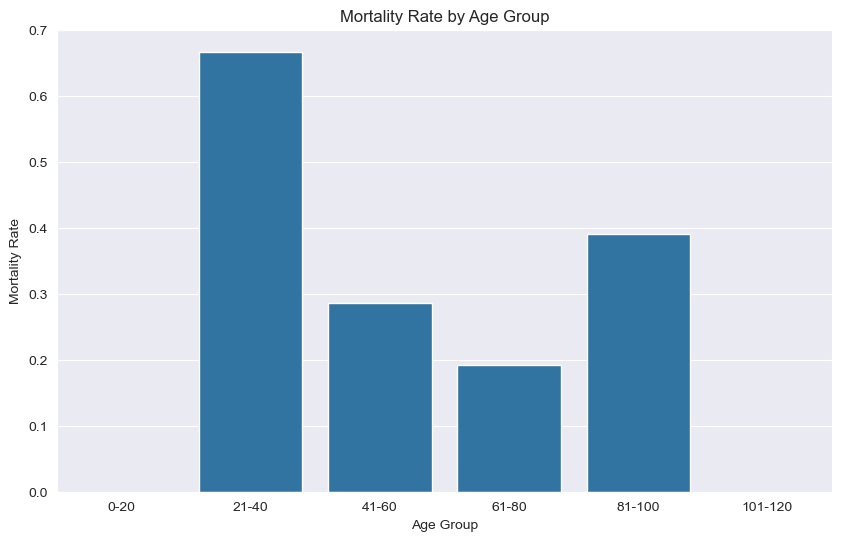

In [9]:
# Calculate the mortality rate for each age group by binning the ages

# Define the age bins
bins = [0, 20, 40, 60, 80, 100, 120]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '101-120']

# Bin the ages
mortality_df['age_group'] = pd.cut(mortality_df['age'], bins=bins, labels=labels, right=False)


# Calculate the mortality rate for each age group
mortality_rate = mortality_df.groupby('age_group')['hospital_expire_flag'].mean().reset_index()
mortality_rate.columns = ['age_group', 'mortality_rate']

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='mortality_rate', data=mortality_rate)
plt.title('Mortality Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mortality Rate')
plt.show()

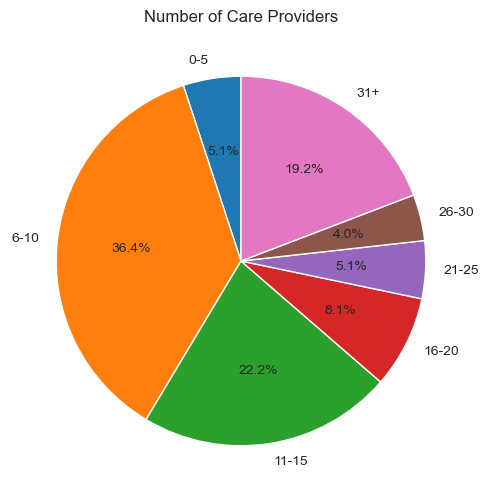

In [10]:
# Visualization 4: Number of Care Providers from chart events using subject_id and cgid

# Get the number of care providers for each subject ID
num_care_providers = chart_events_df.groupby('subject_id')['cgid'].nunique().reset_index()
num_care_providers.columns = ['subject_id', 'num_care_providers']

bins = [0, 5, 10, 15, 20, 25, 30, 200]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31+']
num_care_providers['provider_bins'] = pd.cut(num_care_providers['num_care_providers'], bins=bins, labels=labels, right=False)

bin_counts = num_care_providers['provider_bins'].value_counts().sort_index()


# Create pie chart for the number of care providers from num_care_providers
plt.figure(figsize=(10, 6))
plt.pie(bin_counts, labels=bin_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Number of Care Providers')
plt.show()


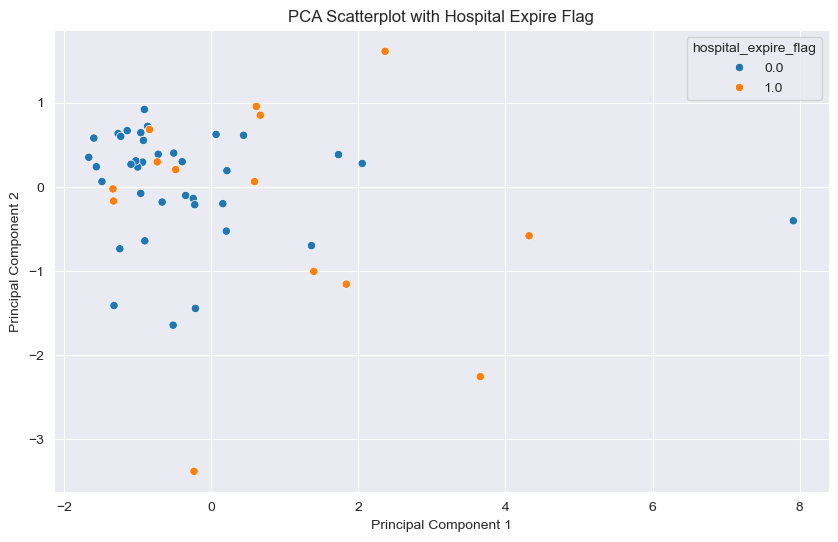

In [11]:
# Visualization 5: PCA scatterplot with labels patients death status

# Create dataframe with subject_id, number of prescriptions, number of procedures, age, length of stay, number of care providers, and hospital_expire_flag

# Merge the num_procedures and num_prescriptions dataframes
combined_df = pd.merge(num_procedures, num_prescriptions, on='subject_id', how='left')


# Merge the combined_df with the mortality_df
combined_df = pd.merge(combined_df, mortality_df[['subject_id', 'hospital_expire_flag', 'age']], on='subject_id', how='left')

# Merge the combined_df with the num_care_providers
combined_df = pd.merge(combined_df, num_care_providers, on='subject_id', how='left')

# Drop duplicates
combined_df = combined_df.drop_duplicates(subset='subject_id')

# Drop rows with NaN values
combined_df = combined_df.dropna()

# Perform PCA on the data

# Select the features for the PCA
features = ['num_procedures', 'num_prescriptions', 'age', 'length_of_stay', 'num_care_providers']

# Create pipeline
scaler = StandardScaler()
pca = PCA(n_components=2)

pipeline = make_pipeline(scaler, pca)

# Fit and transform the data
pca_features = pipeline.fit_transform(combined_df[features])

# Create a new dataframe with the PCA features and the hospital_expire_flag
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
pca_df['hospital_expire_flag'] = combined_df['hospital_expire_flag']

# Plot the PCA scatterplot with labels for hospital_expire_flag
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='hospital_expire_flag', data=pca_df)
plt.title('PCA Scatterplot with Hospital Expire Flag')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
